In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
import yt
from yt.analysis_modules.halo_analysis.api import HaloCatalog

%matplotlib inline

In [3]:
# Set the bounding box limits
unit_base = {'UnitLength_in_cm'         : 3.08568e+21,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = 1E5 # [kpc]

bbox = [[-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim]]

In [12]:
# See http://yt-project.org/doc/cookbook/gadget_notebook.html
# Read the snapshot and then set the bounding box
ds = yt.load('snapshot_032', unit_base=unit_base, bounding_box=bbox)
ad = ds.all_data()

yt : [INFO     ] 2016-11-07 15:56:30,802 Calculating time from 1.600e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2016-11-07 15:56:30,814 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2016-11-07 15:56:30,814 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2016-11-07 15:56:30,815 Parameters: domain_left_edge          = [-100000. -100000. -100000.]
yt : [INFO     ] 2016-11-07 15:56:30,816 Parameters: domain_right_edge         = [ 100000.  100000.  100000.]
yt : [INFO     ] 2016-11-07 15:56:30,817 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2016-11-07 15:56:30,818 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2016-11-07 15:56:30,818 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2016-11-07 15:56:30,818 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2016-11-07 15:56:30,819 Parameters: hubble_constant           = 0.7


In [11]:
sorted(ds.field_list)

[('Disk', 'Coordinates'),
 ('Disk', 'Mass'),
 ('Disk', 'ParticleIDs'),
 ('Disk', 'Velocities'),
 ('Gas', 'Coordinates'),
 ('Gas', 'Density'),
 ('Gas', 'InternalEnergy'),
 ('Gas', 'Mass'),
 ('Gas', 'ParticleIDs'),
 ('Gas', 'SmoothingLength'),
 ('Gas', 'Velocities'),
 ('Halo', 'Coordinates'),
 ('Halo', 'Mass'),
 ('Halo', 'ParticleIDs'),
 ('Halo', 'Velocities'),
 ('all', 'Coordinates'),
 ('all', 'Mass'),
 ('all', 'ParticleIDs'),
 ('all', 'Velocities')]

In [25]:
hc = HaloCatalog(data_ds=ds, finder_method='hop')
hc.create()
help(hc)

yt : [WARNING  ] 2016-11-07 16:38:04,955 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [WARNING  ] 2016-11-07 16:38:04,956 No particle_type, no creation_time, so not distinguishing.
yt : [INFO     ] 2016-11-07 16:38:04,967 Initializing HOP
yt : [WARNING  ] 2016-11-07 16:38:04,968 No particle_type, no creation_time, so not distinguishing.
yt : [INFO     ] 2016-11-07 16:38:05,184 Parsing outputs
yt : [INFO     ] 2016-11-07 16:38:06,133 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-11-07 16:38:06,134 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2016-11-07 16:38:06,134 Parameters: domain_left_edge          = [ -4.40811429e+26  -4.40811429e+26  -4.40811429e+26]
yt : [INFO     ] 2016-11-07 16:38:06,135 Parameters: domain_right_edge         = [  4.40811429e+26   4.40811429e+26   4.40811429e+26]
yt : [INFO     ] 2016-11-07 16:38:06,136 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-11-07 16:38:06,137 Alloc

Help on HaloCatalog in module yt.analysis_modules.halo_analysis.halo_catalog object:

class HaloCatalog(yt.utilities.parallel_tools.parallel_analysis_interface.ParallelAnalysisInterface)
 |  Create a HaloCatalog: an object that allows for the creation and association
 |  of data with a set of halo objects.
 |  
 |  A HaloCatalog object pairs a simulation dataset and the output from a halo finder,
 |  allowing the user to perform analysis on each of the halos found by the halo finder.
 |  Analysis is performed by providing callbacks: functions that accept a Halo object
 |  and perform independent analysis, return a quantity to be associated with the halo,
 |  or return True or False whether a halo meets various criteria.  The resulting set of
 |  quantities associated with each halo is then written out to disk at a "halo catalog."
 |  This halo catalog can then be loaded in with yt as any other simulation dataset.
 |  
 |  Parameters
 |  ----------
 |  halos_ds : str
 |      Dataset cre

SimArray([[ 0.00134315,  0.00134314,  0.00134313, ...,  0.00132157,
         0.00132142,  0.00132127],
       [ 0.00134315,  0.00134314,  0.00134313, ...,  0.0013216 ,
         0.00132147,  0.00132134],
       [ 0.00134315,  0.00134315,  0.00134314, ...,  0.00132163,
         0.00132152,  0.0013214 ],
       ..., 
       [ 0.00134665,  0.00134666,  0.00134668, ...,  0.00132749,
         0.00132738,  0.00132726],
       [ 0.00134645,  0.00134647,  0.00134648, ...,  0.00132737,
         0.00132725,  0.00132712],
       [ 0.00134625,  0.00134627,  0.00134629, ...,  0.00132725,
         0.00132712,  0.00132698]], dtype=float32, '1.00e+10 h**2 Msol Mpc**-3 a**-3')

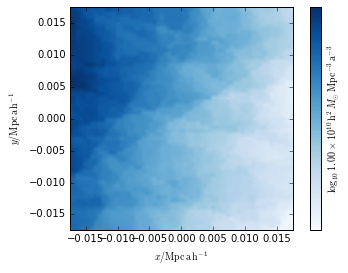

In [29]:
# im = pynbody.plot.image(sim.d, cmap=plt.cm.Greys)
pynbody.plot.image(sim.s, width='50 kpc', av_z=True, cmap=plt.cm.Blues)
